Analyze a mutate run.

In [10]:
from os import listdir
import pandas as pd

decoys = listdir('./decoys/')

In [6]:
len(decoys)

2216

In [7]:
fascs = [f for f in decoys if ".fasc" in f]

In [11]:
data = pd.read_json("./decoys/"+fascs[0], orient='records', lines=True)

for f in fascs[1:]:
    d = pd.read_json("./decoys/"+f, orient='records', lines=True)
    data = data.append(d)

print(data.shape)

(2170, 19)


In [12]:
data.head()

,pdb_name,decoy,filename,nstruct,dslf_ca_dih,dslf_cs_ang,dslf_ss_dih,dslf_ss_dst,fa_atr,fa_dun,fa_elec,fa_pair,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,total_score
0,./decoys/21I,./decoys/21I_28.pdb,./decoys/21I_28.pdb,50,0,0,0,0,-317.082910,11.654043,-7.043129,-2.577285,10.733370,126.523382,-2.839848,-18.334818,-2.513684,-7.956285,-209.437164
1,./decoys/21I,./decoys/21I_0.pdb,./decoys/21I_0.pdb,50,0,0,0,0,-318.453387,11.599302,-6.960122,-2.503421,10.974029,126.843570,-2.732888,-18.750519,-2.218730,-7.956285,-210.158453
2,./decoys/21I,./decoys/21I_17.pdb,./decoys/21I_17.pdb,50,0,0,0,0,-318.298866,11.563834,-6.937212,-2.528623,10.435023,125.926953,-2.838989,-17.994537,-2.359262,-7.956285,-210.987964
3,./decoys/21I,./decoys/21I_37.pdb,./decoys/21I_37.pdb,50,0,0,0,0,-317.644688,11.583019,-6.949103,-2.558708,10.939998,125.106878,-2.741991,-18.265490,-2.391868,-8.102939,-211.024893
4,./decoys/21I,./decoys/21I_8.pdb,./decoys/21I_8.pdb,50,0,0,0,0,-320.438867,11.645472,-7.040502,-2.492864,11.228363,127.057288,-2.862614,-18.306280,-2.338161,-7.956285,-211.504452


In [14]:
mutants = []
for i, r in data.iterrows():
    s = r['pdb_name'].split('/')
    name = s[2]
    mutants.append(name)

data['mutant'] = mutants

In [28]:
position = []
for i, r in data.iterrows():
    p = int(r['mutant'][:-1])
    position.append(p)

data['position'] = position

In [33]:
data.sort_values('position', inplace=True)
data['position']

49     10
2      10
1      10
0      10
49     10
     ... 
12    157
7     157
10    157
0     157
11    157
Name: position, Length: 2170, dtype: int64

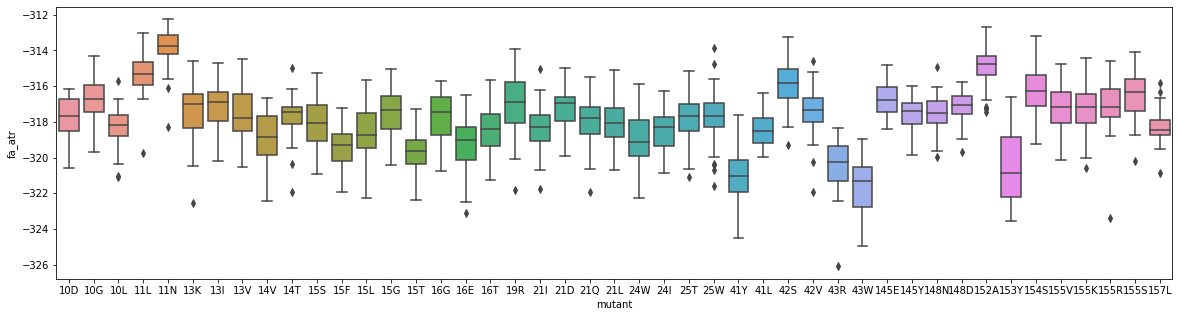

In [34]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
sn.boxplot(x='mutant', y='fa_atr', data=data)

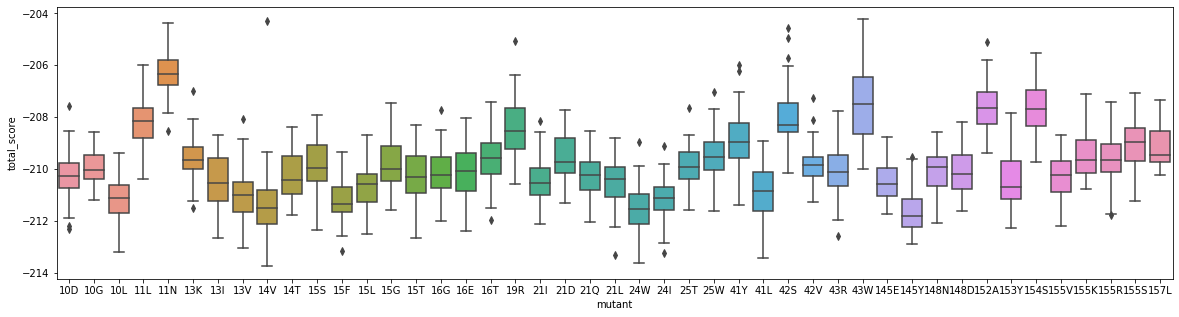

In [35]:
plt.figure(figsize=(20,5))
sn.boxplot(x='mutant', y='total_score', data=data)

Looks intriguing. This would be better as an alanine scan to start. Try an alanine scan at all postions within 8 of the interface.